In [2]:
from __future__ import print_function

import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

1. Linear regression
===================

Prepare data
------------
First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
$$y = \frac{x}{2}+sin(x)+\epsilon$$
Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.

x is: [-3.14159265 -3.07812614 -3.01465962 -2.9511931  -2.88772658 -2.82426006
 -2.76079354 -2.69732703 -2.63386051 -2.57039399 -2.50692747 -2.44346095
 -2.37999443 -2.31652792 -2.2530614  -2.18959488 -2.12612836 -2.06266184
 -1.99919533 -1.93572881 -1.87226229 -1.80879577 -1.74532925 -1.68186273
 -1.61839622 -1.5549297  -1.49146318 -1.42799666 -1.36453014 -1.30106362
 -1.23759711 -1.17413059 -1.11066407 -1.04719755 -0.98373103 -0.92026451
 -0.856798   -0.79333148 -0.72986496 -0.66639844 -0.60293192 -0.53946541
 -0.47599889 -0.41253237 -0.34906585 -0.28559933 -0.22213281 -0.1586663
 -0.09519978 -0.03173326  0.03173326  0.09519978  0.1586663   0.22213281
  0.28559933  0.34906585  0.41253237  0.47599889  0.53946541  0.60293192
  0.66639844  0.72986496  0.79333148  0.856798    0.92026451  0.98373103
  1.04719755  1.11066407  1.17413059  1.23759711  1.30106362  1.36453014
  1.42799666  1.49146318  1.5549297   1.61839622  1.68186273  1.74532925
  1.80879577  1.87226229  1.93572881  1.999195

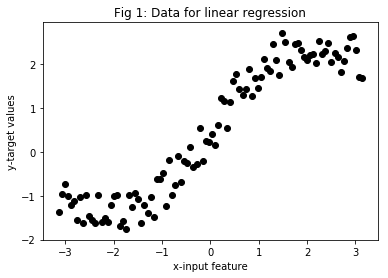

In [3]:
number_of_samples = 100

# create 100 samples between -pi to +pi
x = np.linspace(-np.pi, np.pi, number_of_samples)
print ("x is: {}".format(x))

# evaluate y according to above formulae
# np.random.random(x.shape) ???
y = 0.5*x+np.sin(x)+np.random.random(x.shape)

# Create scatter plot with black colors
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

Split the dataset into training, validation and test sets
---------------------------------------------------
It is always encouraged in machine learning to split the available data into _training_, _validation_ and _test_ sets. The training set is supposed to be used to train the model. The model is evaluated on the validation set after every episode of training. The performance on the validation set gives a measure of how good the model _generalizes_. Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the _test data_ and the performance is reported in the final description of the model. 

In this example we do a $70\%-15\%-15\%$ random split of the data between the training, validation and test sets respectively.

In [4]:
# Random permutations for 0 to number_of_samples(99) numbers
random_indices = np.random.permutation(number_of_samples)
# print ("random indices: {}".format(random_indices))
# print ("random_indices.shape: {}".format(random_indices.shape))
# Training set, First 70 items
# x_train = x[random_indices[:70]]
# y_train = y[random_indices[:70]]

seventy_percent = (int)(number_of_samples * 70/100)
eighty_five_percent = (int)(number_of_samples * 85/100)
# print (seventy_percent)

# Training set, First 70% items
x_train = x[random_indices[:seventy_percent]]
y_train = y[random_indices[:seventy_percent]]
print ("x_train: {}".format(x_train))
print ("x_train.shape: {}".format(x_train.shape))

# Validation set, items from 70 to 85
# x_val = x[random_indices[70:85]]
# y_val = y[random_indices[70:85]]

# Validation set, items from 70% to 85%
x_val = x[random_indices[seventy_percent:eighty_five_percent]]
y_val = y[random_indices[seventy_percent:eighty_five_percent]]

# x_test = x[random_indices[85:]]
# y_test = y[random_indices[85:]]
#Test set, items from 85 to rest
x_test = x[random_indices[eighty_five_percent:]]
y_test = y[random_indices[eighty_five_percent:]]

x_train: [ 0.34906585 -0.09519978  0.72986496 -0.98373103  2.9511931   1.80879577
  2.69732703 -2.31652792  1.42799666 -0.60293192 -0.22213281 -2.44346095
  0.98373103 -1.42799666  0.66639844  1.11066407  0.09519978  1.30106362
 -2.63386051  1.87226229 -0.28559933 -1.99919533  1.99919533  0.28559933
  2.31652792  1.61839622  2.76079354 -1.5549297  -0.47599889 -0.856798
 -2.9511931  -1.93572881 -1.49146318  1.17413059  2.44346095 -2.76079354
 -0.79333148 -1.87226229 -1.74532925  0.856798    0.41253237 -1.68186273
  0.79333148 -2.06266184  2.57039399  2.06266184 -1.11066407  2.37999443
  2.82426006  2.2530614   2.63386051 -0.66639844  0.47599889  0.53946541
  1.5549297  -2.50692747 -1.17413059  1.93572881  3.07812614  0.60293192
 -2.69732703 -2.88772658  1.04719755  0.22213281 -1.04719755 -2.37999443
 -2.2530614   2.18959488 -0.53946541 -1.23759711]
x_train.shape: (70,)


Fit a line to the data
----------------------
Linear regression learns to fit a hyperplane to our data in the feature space. For one dimensional data, the hyperplane reduces to a straight line. We will fit a line to our data using [__sklearn.linear_model.LinearRegression__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[-3.14159265]


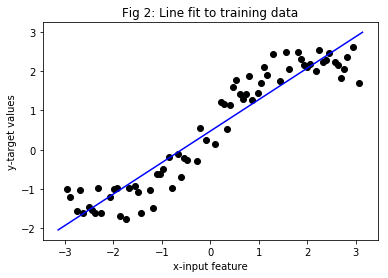

In [5]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshape the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))
# print ("x_train_for_line_fitting: {}".format(x_train_for_line_fitting))
# print ("x_train_for_line_fitting.shape: {}".format(x_train_for_line_fitting.shape))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')

# converting x to column vector
print(x.reshape((len(x),1))[0])

# model predictions for x(column vector)
# print (model.predict(x.reshape((len(x),1))))

plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

Evaluate the model
------------------
Now that we have our model ready, we must evaluate our model. In a linear regression scenario, its common to evaluate the model in terms of the _mean squared error_ on the validation and test sets.

In [6]:
# Get error on validation set(70%-85%)
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )

print(y_val.shape)
print(x_val.reshape((len(x_val),1)).shape)

# Get error on test set(85%-100%)
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

(15,)
(15, 1)
Validation MSE:  5.145060014769509 
Test MSE:  4.385308395670025


2. Logistic regression
======================
Logistic regression is used for classification using a _linear_ decision boundary. Logistic regression works by first looking for linear decision boundaries between the samples of different classes. Then the logistic function $\sigma(\cdot)$ is used to get the probability of belongingness to each class defined with respect to the decision boundaries. The logistic function is defined as follows:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
The output probability of belongingness to a class that can be suitably thresholded to get hard classification.

In this tutorial we will demonstrate this with the example of classifying a part of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris).  

Prepare data
------------
The data has 4 input-features and 3 output-classes. For simplicity we will use only two features: _sepal-length_ and _sepal-width_ (both in cm) and two output classes: _Iris Setosa_ and _Iris Versicolour_. 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


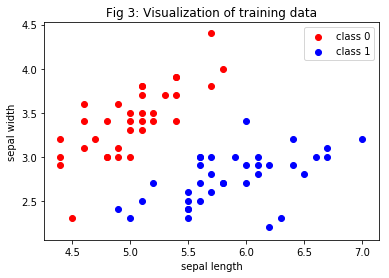

In [7]:
iris = datasets.load_iris()

# X as matrix of all rows and first 2 columns
X = iris.data[:,:2] #Choosing only the first two input-features
# print (X)

Y = iris.target
print (Y)
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
# y0 as label of zeros
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)

X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
# y1 as label of zeros
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

# print ("X_class0: {}".format(X_class0))
# print ("X_class0[:,0]: {}".format(X_class0[:,0]))
# print ("X_class0[:,0].shape: {}".format(X_class0[:,0].shape))

# python2
# plt.scatter([X_class0[:,0]], X_class0[:,1],color='red')
# plt.scatter([X_class1[:,0]], X_class1[:,1],color='blue')

# python3
plt.scatter([X_class0[:,0]], [X_class0[:,1]],color='red')
plt.scatter([X_class1[:,0]], [X_class1[:,1]],color='blue')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

Fit logistic regression model
-----------------------------
Now we fit a linear decision boundary through the feature space that separates the two classes well. We use [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

/home/ubiroute/py3_kernel/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


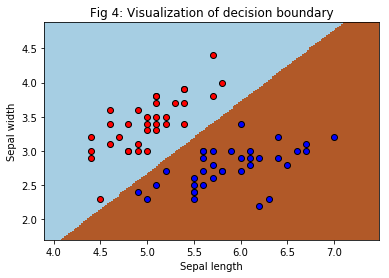

In [10]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter([X_class0[:, 0]], [X_class0[:, 1]], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter([X_class1[:, 0]], [X_class1[:, 1]], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

Notice the linear decision boundary calculated by logistic regression.

Evaluate the model
------------------
We calculate the validation and test misclassification errors.

In [12]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 0.0 %
test misclassification percentage = 0.0 %


Zero misclassification error was possible only because the two classes were _linearly separable_ in the chosen feature space. However this is seldom the case in most real-world classification problems.

3. Decision tree regression
===========================
Now we will solve the same problems using a decision tree. A decision tree is a _non-parametric_ machine learning model in contrast to linear/logistic regression which is a _parametric_ model.

First we solve the regression problem

Prepare data
------------
Same as in Section 1

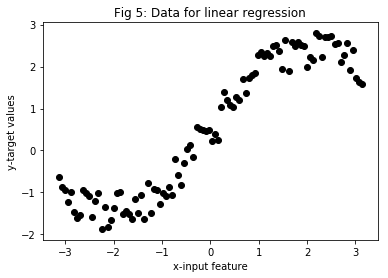

In [13]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

Split the data into training, validation and test sets
------------------------------------------------------


In [14]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
A decision tree learns a piece-wise linear fit to the data. We will use [sklearn.tree.DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

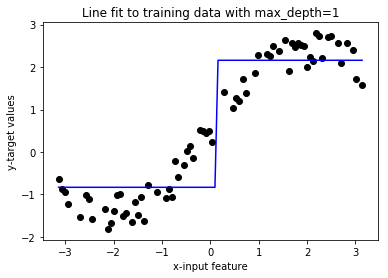

Training MSE:  0.3638200280928687 
Validation MSE:  0.43513962399416733 
Test MSE:  0.5773620246074659


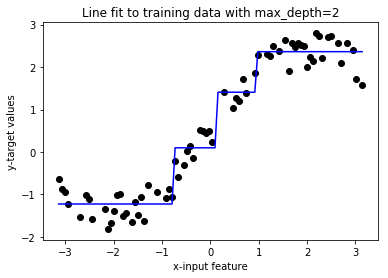

Training MSE:  0.09888618590071956 
Validation MSE:  0.13350979223937495 
Test MSE:  0.21414878810524973


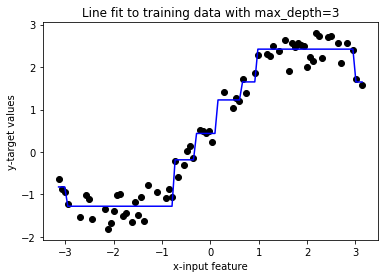

Training MSE:  0.055830467898102115 
Validation MSE:  0.07055409548650735 
Test MSE:  0.14109074084242712


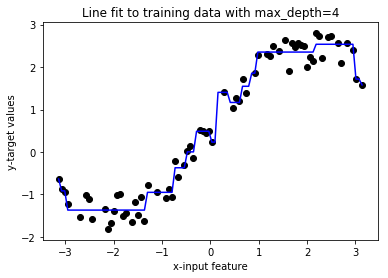

Training MSE:  0.037210283236120724 
Validation MSE:  0.07635950703860778 
Test MSE:  0.17015144039962077


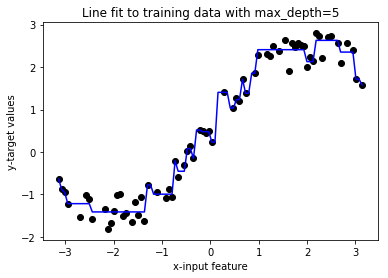

Training MSE:  0.027806013027747673 
Validation MSE:  0.09539902958781896 
Test MSE:  0.14682681871191777


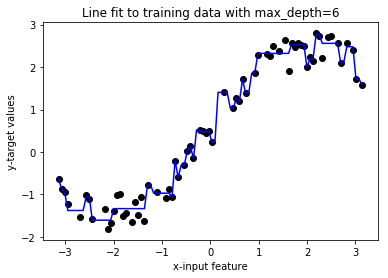

Training MSE:  0.01810290281805215 
Validation MSE:  0.09307043846215825 
Test MSE:  0.18133946096903703


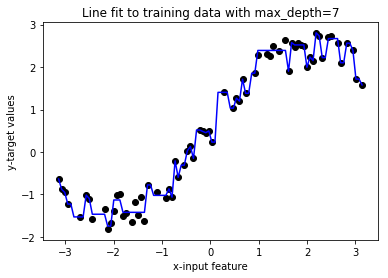

Training MSE:  0.008105696843920865 
Validation MSE:  0.09007897771361421 
Test MSE:  0.19815417906740077


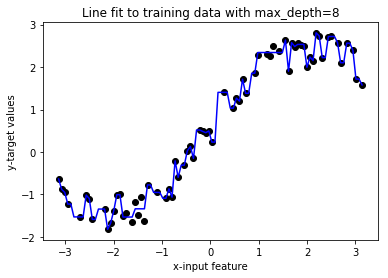

Training MSE:  0.0038567201642039015 
Validation MSE:  0.1003547868385973 
Test MSE:  0.19449765016477547


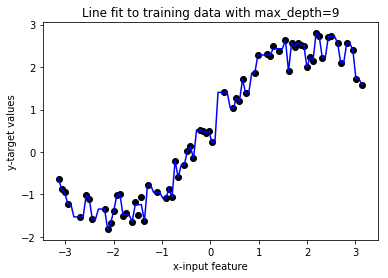

Training MSE:  0.0015604742776892297 
Validation MSE:  0.10375699597993962 
Test MSE:  0.19469433960475052


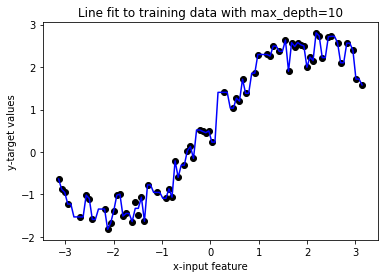

Training MSE:  0.0007562545468127791 
Validation MSE:  0.09979964282881697 
Test MSE:  0.19461705292995554


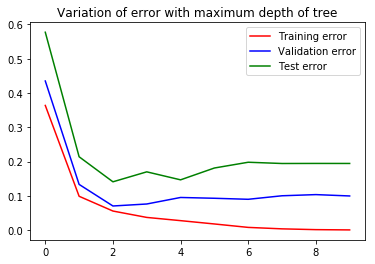

In [17]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

Notice how the generalization performance of the model can be controlled via the depth of a decision tree. The training error decreases steadily with increasing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias in the model reduces. However, as we increase the depth beyond 3, the model starts overfitting the data (huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.

4. Decision tree classification
===============================

A decision tree can be used to learn a piece-wise linear decision boundary between classes. We demonstrate the working of a decision tree on the entire of Iris dataset. We use [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

The example was taken from: http://scikit-learn.org/stable/modules/tree.html#classification.

The decision boundaries learnt by the different decision nodes can be visualized as described here: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#plot-the-decision-surface-of-a-decision-tree-on-the-iris-dataset.

Prepare the data-set
--------------------

In [18]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

Fit the model
------------

In [19]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualize the model
-------------------

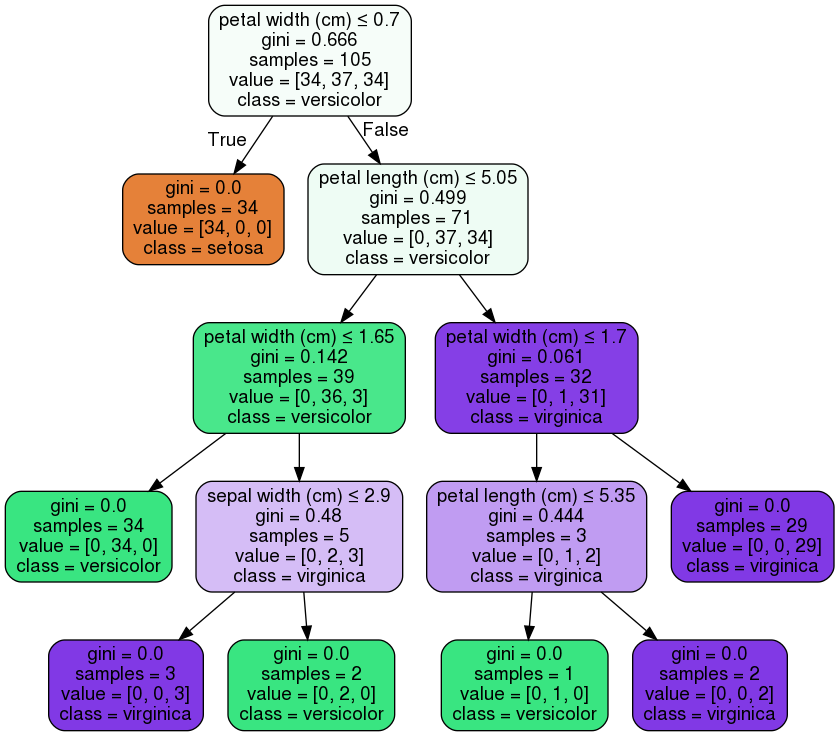

In [23]:
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 

The [_gini coefficient_](https://en.wikipedia.org/wiki/Gini_coefficient) is a measure of homogenity in a cluster. Gini coefficient of 0.0 indicates that a cluster is completely homogeneous (i.e. only one class is present in the cluster).

Evaluate the model
------------------  

In [25]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 9.090909090909092 %
test misclassification percentage = 9.090909090909092 %
